In [1]:
conda install opencv

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [51]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy.random import seed

# Random and Math and Numpy for Mathematical Operations
from random import randint
from random import uniform
import math

# Loading libraries to read images
from PIL import Image
from skimage.io import imread
# skimage for Image Transformations
from skimage import filters
from skimage import color
from skimage import exposure
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
from skimage.transform import AffineTransform
import cv2

# Loading necessary libraries from sklearns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Loading libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Pickle for Caching, Storing and Retrieving Data
##ASK RUDRI ABOUT PICKLE
import pickle
import time
from datetime import datetime
import warnings

# Import Shuffling function from SKLEARN
from sklearn.utils import shuffle

# Pandas For Data Visualization, TQDM for Progress Bar
from  tqdm import tqdm
from tqdm import trange
from IPython.display import display, HTML

print ("modules downloaded")

modules downloaded


In [52]:
print(os.listdir('/Users/angelgeisen/Self Driving Car/input'))

['Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']


In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [71]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [37]:
nRowsRead = 1000 # specify 'None' if want to read whole file
meta = pd.read_csv('/Users/angelgeisen/Self Driving Car/input/Meta.csv', delimiter=',', nrows = nRowsRead)
meta.dataframeName = 'Meta.csv'
nRow, nCol = meta.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 43 rows and 5 columns


In [38]:
meta.head(5)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


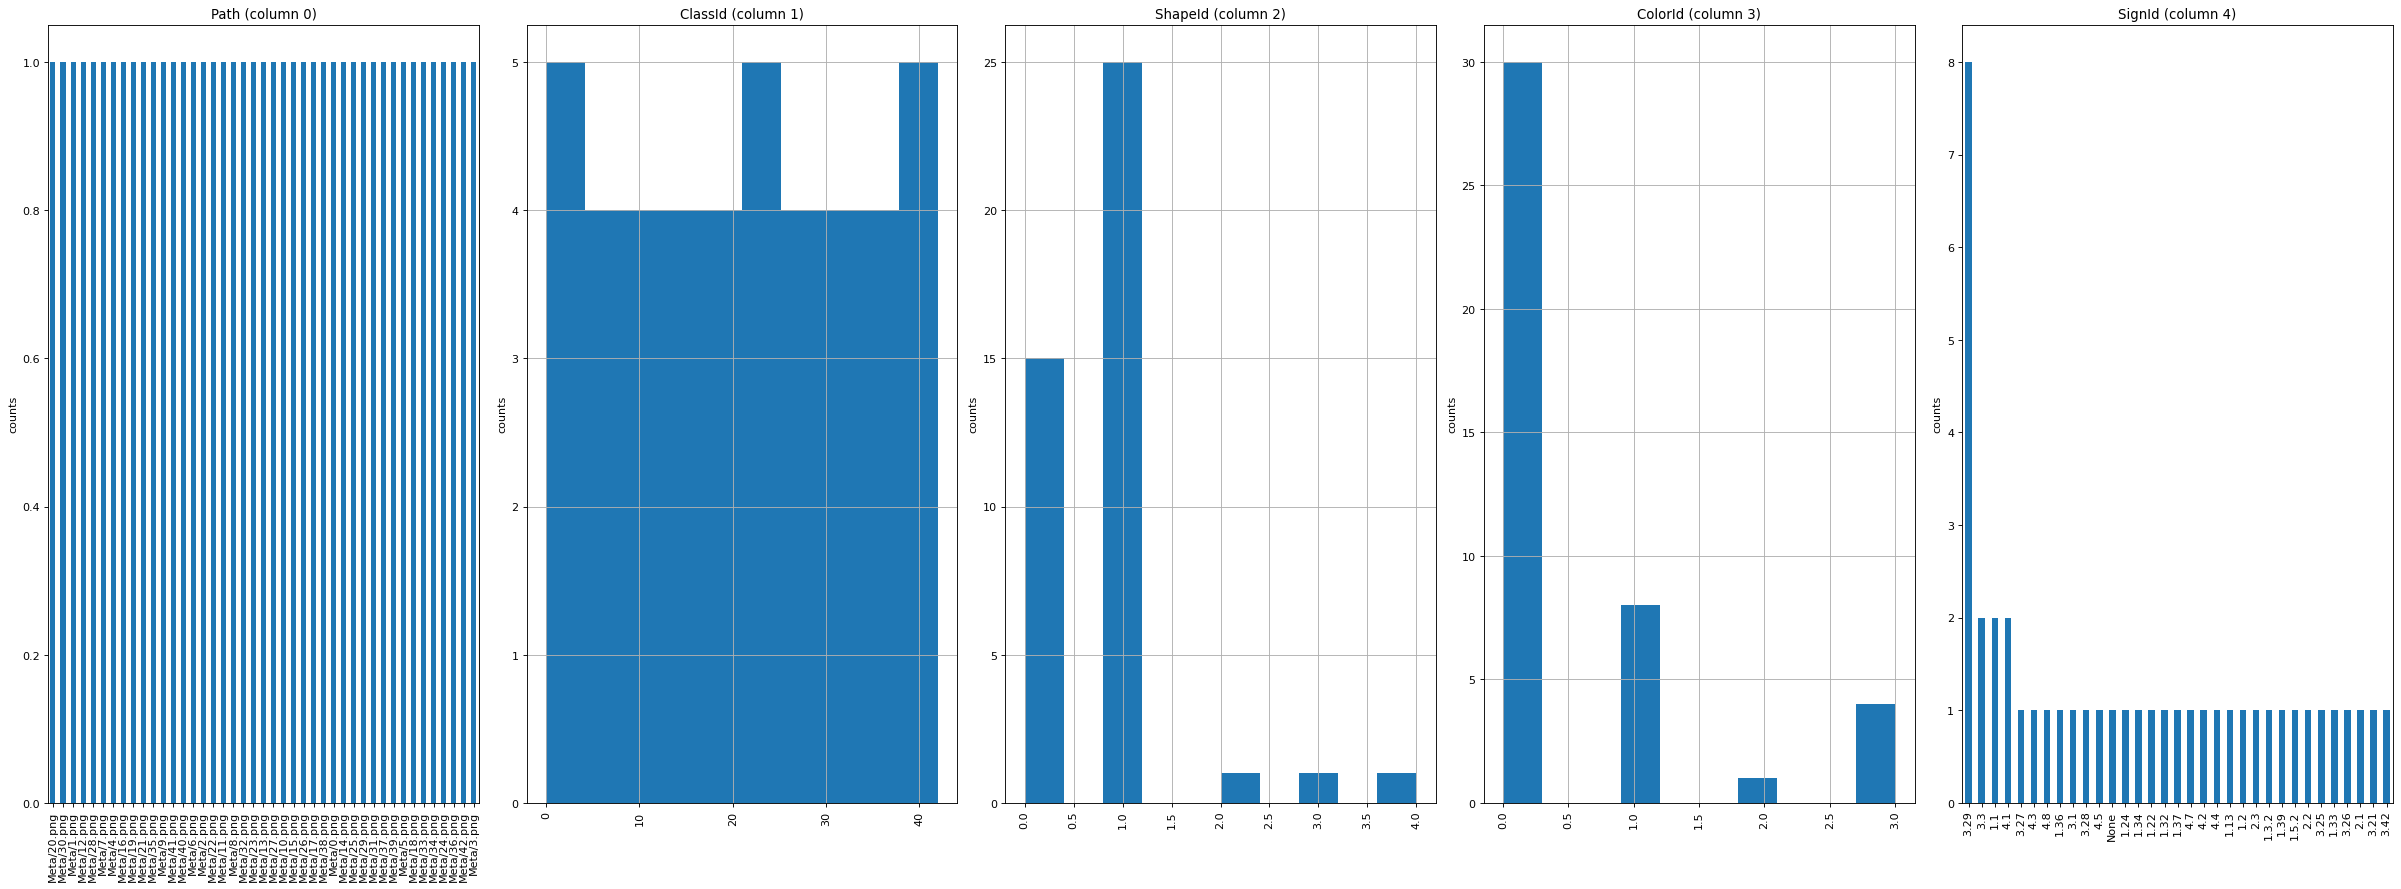

In [77]:
plotPerColumnDistribution(meta, 10, 10)

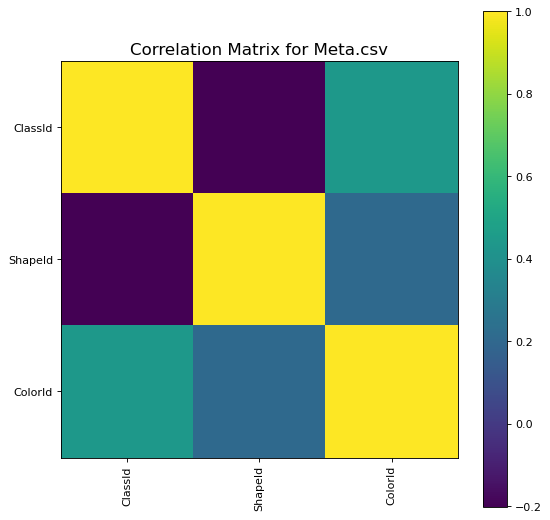

In [73]:
plotCorrelationMatrix(meta, 8)

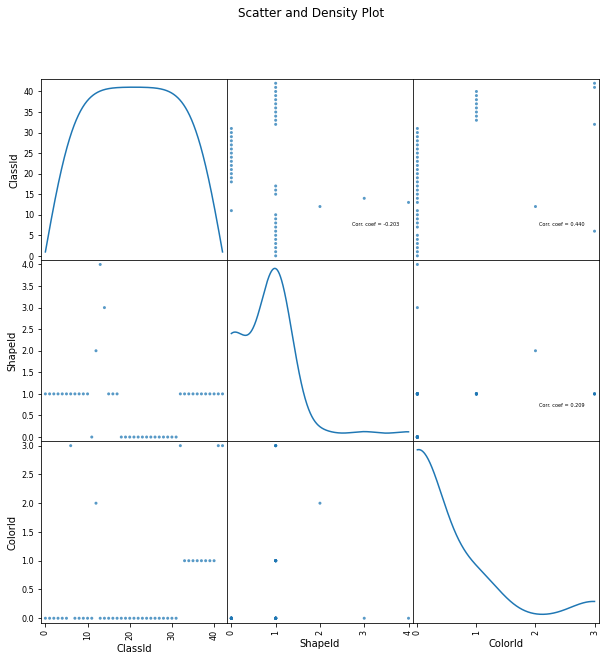

In [74]:
plotScatterMatrix(meta, 10, 5)

In [41]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Test.csv has 12630 rows in reality, but we are only loading/previewing the first 1000 rows
test = pd.read_csv('/Users/angelgeisen/Self Driving Car/input/Test.csv', delimiter=',', nrows = nRowsRead)
test.dataframeName = 'Test.csv'
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [42]:
test.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


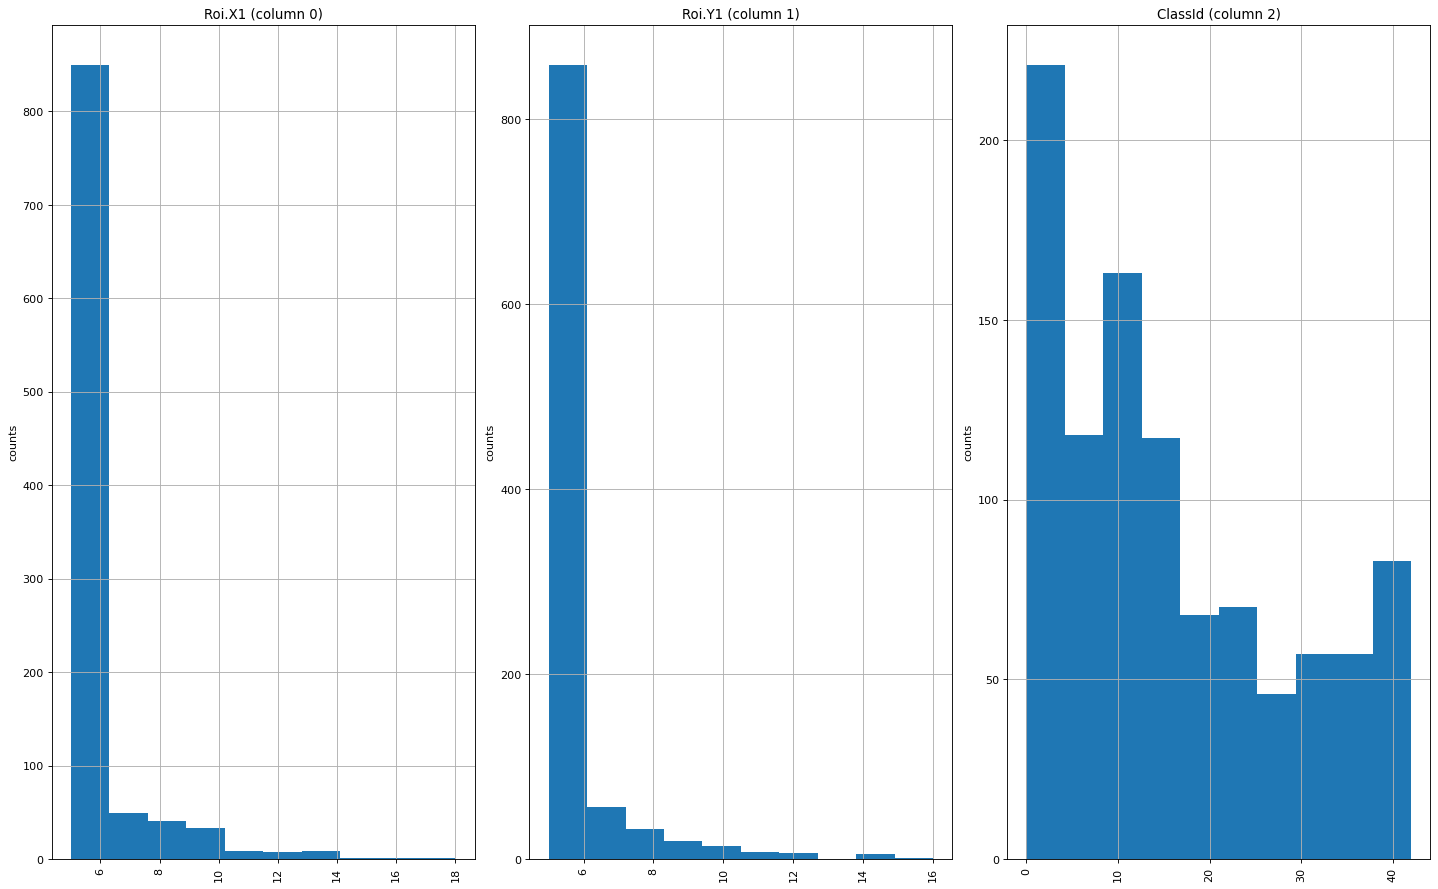

In [43]:
plotPerColumnDistribution(test, 10, 5)

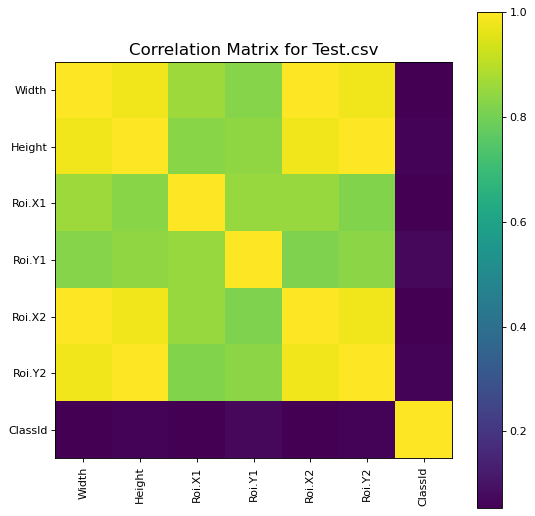

In [19]:
plotCorrelationMatrix(df2, 8)

In [33]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Train.csv has 39209 rows in reality, but we are only loading/previewing the first 1000 rows
train = pd.read_csv('/Users/angelgeisen/Self Driving Car/input/Train.csv', delimiter=',', nrows = nRowsRead)
train.dataframeName = 'Train.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


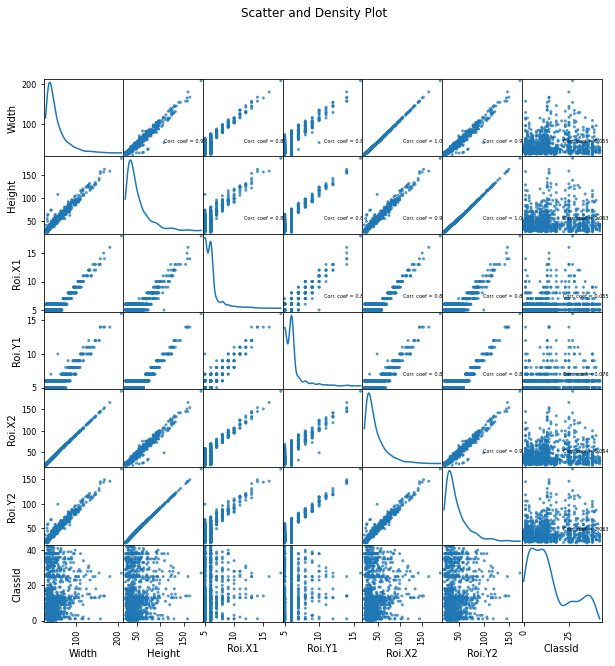

In [75]:
plotScatterMatrix(test, 10, 5)

In [34]:
train.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


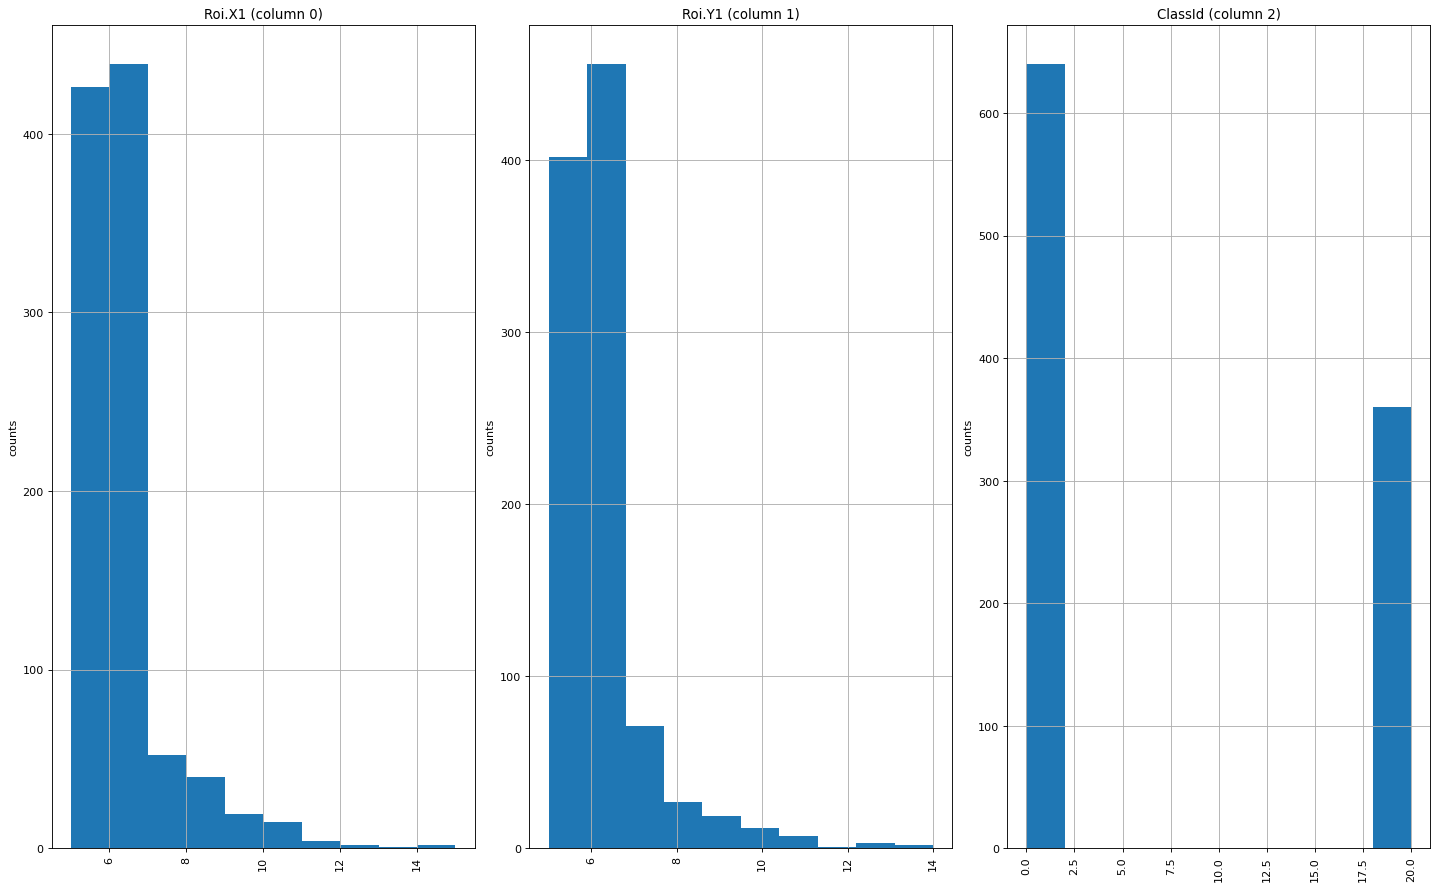

In [44]:
plotPerColumnDistribution(train, 10, 5)

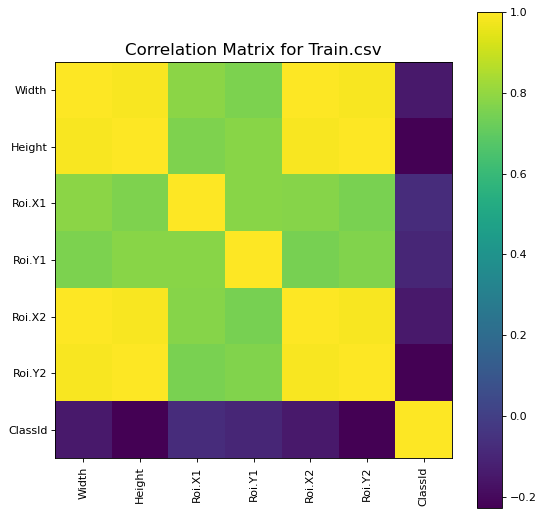

In [36]:
plotCorrelationMatrix(train, 8)

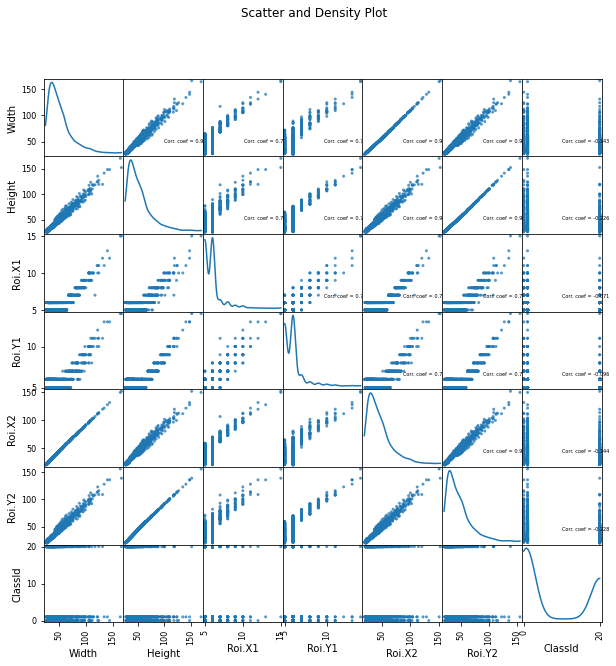

In [76]:
plotScatterMatrix(train, 10, 5)

In [45]:
#set the seed

seed(111)


In [68]:
def load_data(file):
    with open('/Users/angelgeisen/Self Driving Car/input', mode='rb') as f:
        file_ = pickle.load(f)  
    x_, y_ = file_['features'], file_['labels']
    print("Data and Modules loaded")
    return x_,y_


In [69]:
def populate_dataframe(X_input,y_input, file_name):
    n_classes, counts = np.unique(y_input, return_counts=True)
    # TODO: Number of training examples
    n_train = len(X_input)
    # TODO: What's the shape of an traffic sign image?
    image_shape = X_input[0].shape
    df = pd.read_csv("signnames.csv")

    # Populating the Data Frame
    df['Counts'] = counts
    # Random Check to verify if the sorting of data is consistent.
    randval = randint(0, len(X_input) - 1)
    rowindex = y_input[randval]
    condition = df['ClassId'] == rowindex
    y_name = df[condition]

    # Classes of signs that, when flipped horizontally, should still be
    # classified as the same class
    self_flippable_horizontally = np.array(
        [11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    df_sfh = np.empty(len(n_classes), dtype=object)
    for i in range(len(df_sfh)):
        if i in self_flippable_horizontally:
            df_sfh[i] = "yes"
        else:
            df_sfh[i] = "no"
    df['Horizontally Flippable'] = df_sfh


In [70]:
# Classes of signs that, when flipped vertically, should still be
    # classified as the same class
self_flippable_vertically = np.array([1, 5, 12, 15, 17])
df_sfv = np.empty(len(n_classes), dtype=object)
for i in range(len(df_sfv)):
        if i in self_flippable_vertically:
            df_sfv[i] = "yes"
        else:
            df_sfv[i] = "no"
df['Vertically Flippable'] = df_sfv

 # Classes of signs that, when flipped horizontally and then vertically,
# should still be classified as the same class
self_flippable_both = np.array([32, 40])
df_sfb = np.empty(len(n_classes), dtype=object)
for i in range(len(df_sfb)):
        if i in self_flippable_both:
            df_sfb[i] = "yes"
        else:
            df_sfb[i] = "no"
df['Flippable Both Ways'] = df_sfb
  

NameError: name 'n_classes' is not defined